# Holophenotype clustermap

> Fill in a module description here

In [16]:
#| default_exp 04_Holophenotype_Dendrogram

In [17]:
#| hide
from nbdev.showdoc import *

In [15]:
#| export
# import svgutils
# from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
import esploco.plotTools
from esploco.plotTools import setFont
setFont('Inter', 6)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib
font_dirs = ["/Users/sangyuxu/Library/Fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
plt.rcParams['svg.fonttype'] = 'none'
import pickle
%run spiral_heatmap.ipynb
import dabest
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import esploco.plotTools as plotTools
plotTools.setFont('inter', 9)

In [32]:

%matplotlib inline

paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure7/'
metapath = paperpath + 'DataforFigures/Behavior/Data/Figure6exptMeta.csv'
fullMetaData = pd.read_csv(metapath)
fullMetaData['Expt'] = fullMetaData['Expt'].str.replace('CsCh','Chr')
fullMetaData['Expt'] = fullMetaData['Expt'].str.replace(' hr',' h')
dataDict=dict()
stateDict = {'24':'Starved','48':'Starved', '0':'Fed'}
for i in range(len(fullMetaData)):
    data = pd.read_csv(picklepath + fullMetaData.iloc[i, 1]).sort_values(by = ['Status', 'Light'])
    data['Starvation'] = data['Starvation'].round().astype('str')
    dataDict[fullMetaData.iloc[i, 0] ]= data
    if i ==0:
        fullMetaData.iloc[i, -1] = len(data.loc[data['Status']=='Ctrl'])
        fullMetaData.iloc[i, -3] = 'var'
        fullMetaData.iloc[i, -2] = 'var'

    else:
        fullMetaData.iloc[i, -3] = data['Starvation'][0]
        fullMetaData.iloc[i, -2] = stateDict[data['Starvation'][0]]
        fullMetaData.iloc[i, -1] = len(data.loc[data['Status']=='Test'])
starvationhrs = dataDict['w1118'].Starvation.unique()
vectorselection = ['Volume', 'Feed Speed', 'Meal Size', 'Meal Duration', 'Duration', 'Count', 'Height', 
    'Food Port Occupancy', 'Ctrl Port Occupancy','Latency', 'Speed', 'Prefeed Speed', 'Duringfeed Speed',  'Postfeed Speed', 'Duringfeed Speed Ratio',
                   'Perifeed Speed Ratio',  
                   'Falls',
                  ]

# construct new w1118_ele
w1118base = dataDict['w1118'].loc[dataDict['w1118']['Starvation'] == '0']
w1118base1 = dataDict['w1118'].loc[dataDict['w1118']['Starvation'] == '0']
w1118base1['Starvation'] = '00'
w1118base = pd.concat([w1118base, w1118base1])

w1118base.loc[w1118base['Starvation'] == '0', 'Status'] = 'Test'
w1118base.to_csv(picklepath + 'w1118_base.csv')

w1118_24st = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='48']
w1118_24st.loc[w1118_24st['Starvation'] == '24', 'Status'] = 'Test'
w1118_24st.to_csv(picklepath + 'w1118_24st.csv')

w1118_24rv = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='48']
w1118_24rv.loc[w1118_24rv['Starvation'] == '0', 'Status'] = 'Test'
w1118_24rv.to_csv(picklepath + 'w1118_24rv.csv')

w1118_48st = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='24']
w1118_48st.loc[w1118_48st['Starvation'] == '48', 'Status'] = 'Test'
w1118_48st.to_csv(picklepath + 'w1118_48st.csv')

w1118_48rv = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='24']
w1118_48rv.loc[w1118_48rv['Starvation'] == '0', 'Status'] = 'Test'
w1118_48rv.to_csv(picklepath + 'w1118_48rv.csv')

w1118Table= [ ['baseline','w1118_base.csv','wildtype','delta','00','0',0],
            ['24 h starved','w1118_24st.csv',  'wildtype','delta','24','Fed',0],
            ['24 h reversed','w1118_24rv.csv','wildtype', 'delta','0','Starved',0],
            ['48 h starved','w1118_48st.csv', 'wildtype','delta','48','Fed',0],
            ['48 h reversed','w1118_48rv.csv','wildtype', 'delta','0', 'Starved', 0],
]
# pd.DataFrame(data = w1118Table, columns = fullMetaData.columns)
fullMetaData = pd.concat([fullMetaData.drop(fullMetaData.loc[fullMetaData.Expt == 'w1118'].index), pd.DataFrame(data = w1118Table, columns = fullMetaData.columns)]).reset_index(drop = True)
for i in fullMetaData.loc[fullMetaData['Group']=='wildtype'].index:
    data = pd.read_csv(picklepath + fullMetaData.iloc[i, 1]).sort_values(by = ['Status', 'Light'])
    dataDict[fullMetaData.iloc[i, 0] ]= data
fullMetaData1 = fullMetaData.drop(6)


/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_36957/2924111335.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1118base1['Starvation'] = '00'


In [33]:
fullMetaData1

,Expt,File,Group,Delta Type,Starved Hours,State,Test Sample Size
0,TrhTrhi,TrhTrhi_ele.csv,RNAi,delta,0,Fed,30.0
1,TrhGluti,TrhGluti_ele.csv,RNAi,delta,0,Fed,36.0
2,TrhSut2i,TrhSut2i_ele.csv,RNAi,delta,0,Fed,28.0
3,TrhVTrhi,TrhVTrhi_ele.csv,RNAi,delta,0,Fed,36.0
4,TrhVGluti,TrhVGluti_ele.csv,RNAi,delta,0,Fed,28.0
5,TrhVSut2i,TrhVSut2i_ele.csv,RNAi,delta,0,Fed,53.0
7,24 h starved,w1118_24st.csv,wildtype,delta,24,Fed,0.0
8,24 h reversed,w1118_24rv.csv,wildtype,delta,0,Starved,0.0
9,48 h starved,w1118_48st.csv,wildtype,delta,48,Fed,0.0
10,48 h reversed,w1118_48rv.csv,wildtype,delta,0,Starved,0.0


# Take a look at the meta data for the whole dataset

In [34]:
def collectContrasts(metadata, dimension, namelist, vectorselection):
    
    expts = metadata.loc[metadata[dimension].isin(namelist)].reset_index(drop=True)
    contrasts = []
    for i in range(len(expts)):
        contrast_vector = [None]*len(vectorselection)
        print(expts.iloc[i].Expt)
        # print(metadata.loc[metadata.Expt == expts.iloc[i].Expt]['Delta Type'])
        if metadata.loc[metadata.Expt == expts.iloc[i].Expt]['Delta Type'].values[0] == 'deltadelta':
            for j in range(len(vectorselection)):
                contrast_vector[j] = dabest.load(dataDict[expts.iloc[i].Expt], x = ['Light', 'Genotype'], 
                                                     experiment = 'Status', delta2 = True, 
                                                     y = vectorselection[j], 
            #                                          x1_level=['Ctrl', 'Test'], 
                                                     experiment_label=['Ctrl', 'Test'])
            # contrast_vector[0].mean_diff.plot()
        else:
            for j in range(len(vectorselection)):
                contrast_vector[j] = dabest.load(dataDict[expts.iloc[i].Expt], x = 'Status',
                                                     y = vectorselection[j], 
                                                     idx=('Ctrl', 'Test'),)   
            # contrast_vector[0].mean_diff.plot()

        contrasts.append(contrast_vector)
    return contrasts, expts.Expt.tolist(), expts['Delta Type'].tolist(), vectorselection


In [35]:
contrasts, expt, deltaType, vectorselection = collectContrasts(fullMetaData1, 'Group', ['wildtype', 'RNAi'], vectorselection)
# 

TrhTrhi
TrhGluti
TrhSut2i
TrhVTrhi
TrhVGluti
TrhVSut2i
24 h starved
24 h reversed
48 h starved
48 h reversed


In [36]:
contrasts[4][0]

DABEST v2024.03.29
                  
Good evening!
The current time is Thu Dec 26 23:29:15 2024.

Effect size(s) with 95% confidence intervals will be computed for:
1. Test minus Ctrl

5000 resamples will be used to generate the effect size bootstraps.

In [37]:
def getBootstrapsAndG(contrasts, expt, deltaType, vectorselection):
    bootstrapsDf = pd.DataFrame(index = expt, columns = vectorselection)
    gDf = pd.DataFrame(index = expt, columns = vectorselection, dtype=float)
    for i in range(len(contrasts)):
        print(expt[i])
        for j in range(len(contrasts[0])):
            if deltaType[i] == 'delta':
                bootstrap = [contrasts[i][j].hedges_g.results.bootstraps[0]]
                g = contrasts[i][j].hedges_g.results.difference[0]
            elif deltaType[i] == 'deltadelta':
                bootstrap = [contrasts[i][j].delta_g.delta_delta.bootstraps_delta_delta]
                g = contrasts[i][j].delta_g.delta_delta.difference
            bootstrapsDf.loc[expt[i], vectorselection[j]] = bootstrap
            gDf.loc[expt[i], vectorselection[j]] = g
#         bootstrapsDf['Expt'] = expt[i]
#         gDf['Expt'] = expt[i]
    return bootstrapsDf, gDf
bootstrapsDf, gDf = getBootstrapsAndG(contrasts, expt, deltaType, vectorselection)

gDf  = gDf.rename(index = {'AKH3>Chr':'AKH>Chr', 'AKH2>ACR1':'AKH>ACR1'})


TrhTrhi
TrhGluti
TrhSut2i


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


TrhVTrhi


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


TrhVGluti
TrhVSut2i
24 h starved


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


24 h reversed


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


48 h starved
48 h reversed


In [ ]:
# gDf.index
# expt = expt.rename('AKH3>Chr','AKH>Chr')

ValueError: The condensed distance matrix must contain only finite values.

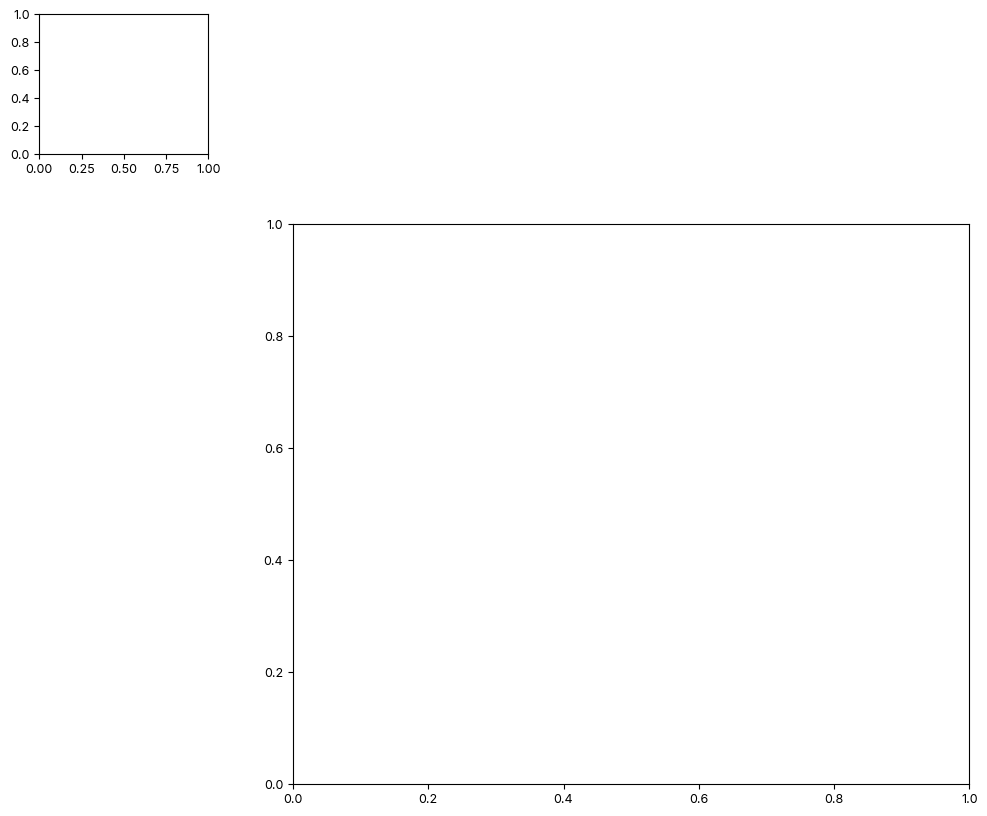

In [22]:


from scipy.cluster import hierarchy

fclu = sns.clustermap(gDf, cmap='vlag',
               method = 'average',
               metric = 'correlation', 
               figsize=(12, 10), vmin=3, vmax=-3)
newind = fclu.dendrogram_row.reordered_ind
contrasts_new = [contrasts[i] for i in newind]
delta_types_new =  [deltaType[i] for i in newind]
expt_new = [expt[i] for i in newind]
expt_new[1] = 'AKH>Chr'
expt_new[17] = 'AKH>ACR1'
Zy = hierarchy.linkage(gDf, method = 'average', metric = 'correlation');
Zx = hierarchy.linkage(gDf.T, method = 'average',  metric = 'correlation');
# Zy_ = [Zy[len(Zy)-i-1] for i in range(len(Zy))]
f = plt.figure(figsize=(10, 9));
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = f.add_gridspec(2, 2,  width_ratios=(1, 4), height_ratios=(1, 6),
                      left=0, right=1, bottom=0, top=1,
                      wspace=0, hspace=0);
# Create the Axes.
ax = f.add_subplot(gs[1, 1]);
ax_denx = f.add_subplot(gs[0, 1]);
ax_deny = f.add_subplot(gs[1, 0]);

%run spiral_heatmap.ipynb

sp, mean = spiral_heatmap(contrasts_new, 21, expt_new, 
                         vectorselection, sort_by = fclu.dendrogram_col.reordered_ind, 
                                            reverse_neg = False,   abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types_new, ax =ax,);


plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
hierarchy.set_link_color_palette(['red', 'orange',  'steelblue', 'forestgreen'])
with plt.rc_context({'lines.linewidth': 1}):
    dn = hierarchy.dendrogram(Zx, ax = ax_denx,above_threshold_color='gray',color_threshold=.88,
                               );
    dn = hierarchy.dendrogram(Zy, ax = ax_deny, above_threshold_color='gray',color_threshold=.90, orientation = 'left',distance_sort='descending'
                              );
ax_denx.set_ylim(0, 3)
ax_denx.set_xlim(0, 250)
ax_denx.set_yticks([])
ax_denx.set_xticks([])
ax_denx.set_frame_on(False) 
ax_deny.set_ylim(0, 10*len(newind))
ax_deny.set_xlim(3,0)
ax_deny.set_yticks([])
ax_deny.set_xticks([])
ax_deny.set_frame_on(False) 
# ax.set_aspect('equal')
ax.yaxis.tick_right()
ax.set_yticklabels(ax.get_yticklabels(), ha = 'left', fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12)
xtl = ax.get_yticklabels()    
for x in xtl:
    if '>' in x.get_text():
        x.set_style('italic')   
f.subplots_adjust(hspace=0)
f

# Alternate: turn spiral heatmap around

In [225]:
contrasts_df_arr = rearrange_dataframe(contrasts_df, expt_arr, vectorselection_arr)
len(contrasts_df_arr)

17

In [25]:
        
sp, mean = spiral_heatmap_ind(contrasts_df_arr, 21, vectorselection_arr, 
                         expt_arr, 
                                            reverse_neg = False,   abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types_df_arr, ax =None,);


NameError: name 'contrasts_df_arr' is not defined

In [38]:
gDf

,Volume,Feed Speed,Meal Size,Meal Duration,Duration,Count,Height,Food Port Occupancy,Ctrl Port Occupancy,Latency,Speed,Prefeed Speed,Duringfeed Speed,Postfeed Speed,Duringfeed Speed Ratio,Perifeed Speed Ratio,Falls
TrhTrhi,1.160626,0.249385,0.099157,0.188985,1.107485,1.021587,0.484033,0.136551,0.988441,-0.770799,1.097646,0.893886,0.507782,0.822520,-0.387203,0.094726,0.377940
TrhGluti,-0.235652,0.185319,0.212848,0.178301,-0.362930,-0.268008,-0.496659,-0.096424,-0.171743,-0.317179,0.116305,0.307447,-0.087118,0.201061,-0.539825,-0.010745,0.427786
TrhSut2i,-0.278218,0.708527,0.435873,0.280236,-0.405055,-0.429565,0.216324,-0.396457,0.223567,-0.165278,-0.276993,-0.125221,-0.235634,-0.229626,-0.164501,0.162629,-0.052755
TrhVTrhi,0.499388,0.529397,0.261753,-0.034968,-0.063045,-0.089639,-0.215093,-0.120259,-0.045379,-0.619158,0.030472,0.548310,0.574855,0.358061,-0.378142,-0.079980,0.247935
TrhVGluti,0.377847,0.354987,0.327689,0.251428,0.097828,0.144159,-0.225272,0.084421,-0.121372,-0.478916,0.396034,0.147337,-0.017072,0.253473,-0.055784,0.379293,0.249913
TrhVSut2i,0.712865,0.707122,0.894369,0.753539,0.153481,0.057733,0.224786,-0.197480,0.285044,-0.739965,-0.030713,-0.042133,0.170802,0.151435,0.126609,0.353610,0.052097
24 h starved,0.783153,0.673002,0.735388,0.837757,0.496642,-0.088957,0.179191,0.105257,-0.497374,-0.337563,-0.451960,-0.367537,-0.837040,-0.862834,0.157081,-0.462288,0.651541
24 h reversed,-0.783153,-0.673002,-0.735388,-0.837757,-0.496642,0.088957,-0.179191,-0.105257,0.497374,0.337563,0.451960,0.367537,0.837040,0.862834,-0.157081,0.462288,-0.651541
48 h starved,1.910540,1.256454,1.252614,1.278736,1.298600,0.288852,0.321309,0.507017,-0.485097,-0.850648,-0.523033,-0.371640,-0.996764,-0.699754,0.134959,-0.731574,0.050277
48 h reversed,-1.910540,-1.256454,-1.252614,-1.278736,-1.298600,-0.288852,-0.321309,-0.507017,0.485097,0.850648,0.523033,0.371640,0.996764,0.699754,-0.134959,0.731574,-0.050277


In [39]:
import pandas as pd

def rearrange_dataframe(df, new_column_order=None, new_row_order=None):
    """
    Rearrange DataFrame columns and rows based on new indices
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    new_column_order (list): New order of column names
    new_row_order (list): New order of row indices
    
    Returns:
    pandas.DataFrame: Rearranged DataFrame
    """
    # Create a copy to avoid modifying the original
    result = df.copy()
    
    # Rearrange columns if new order is provided
    if new_column_order is not None:
        result = result[new_column_order]
    
    # Rearrange rows if new order is provided
    if new_row_order is not None:
        result = result.loc[new_row_order]
    
    return result



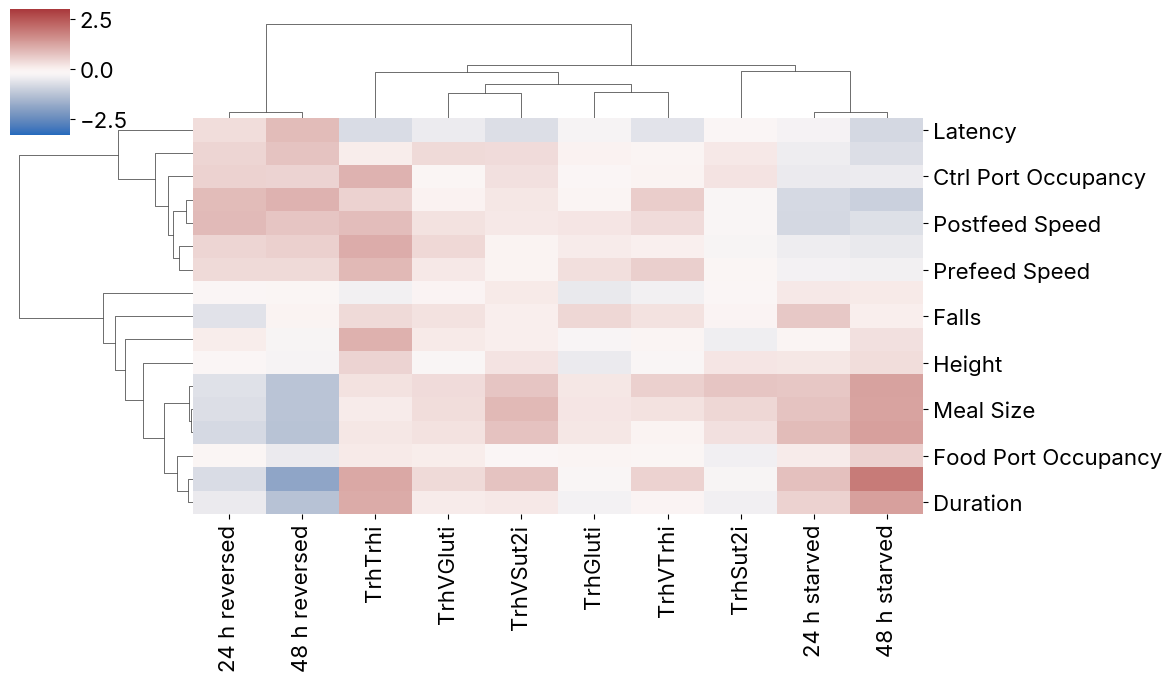

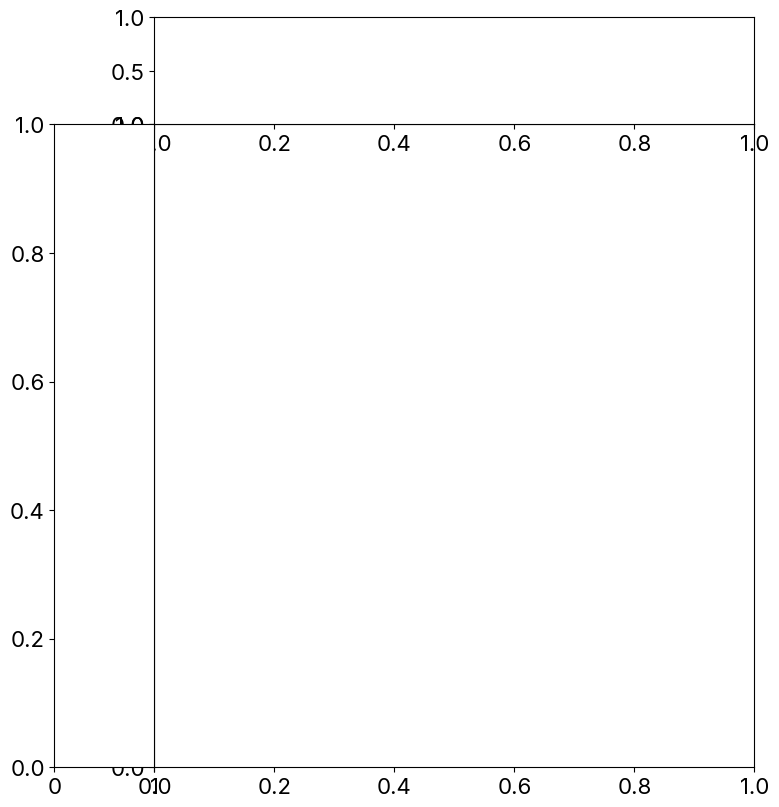

<Figure size 640x480 with 0 Axes>

In [121]:
#alternate horizontal
setFont('Inter', 16)
gDf_transposed = gDf.transpose()
from scipy.cluster import hierarchy

fclu = sns.clustermap(gDf_transposed, cmap='vlag',
               method = 'average',
               metric = 'correlation', 
               figsize=(12, 7), vmin=3, vmax=-3);
# newind = fclu.dendrogram_row.reordered_ind
contrasts_df = pd.DataFrame(data = np.array(contrasts).T.tolist(), index = vectorselection, columns = expt)
delta_types_df = pd.DataFrame(np.array([deltaType for i in range(17)]), index = vectorselection, columns = expt)
vectorselection_arr = [vectorselection[i] for i in fclu.dendrogram_row.reordered_ind]
expt_arr = [expt[i] for i in fclu.dendrogram_col.reordered_ind]
delta_types_df_arr = rearrange_dataframe(delta_types_df, expt_arr, vectorselection_arr)
contrasts_df_arr = rearrange_dataframe(contrasts_df, expt_arr, vectorselection_arr)

Zy = hierarchy.linkage(gDf_transposed, method = 'average', metric = 'correlation');
Zx = hierarchy.linkage(gDf, method = 'average',  metric = 'correlation');
# Zy_ = [Zy[len(Zy)-i-1] for i in range(len(Zy))]
f = plt.figure(figsize=(7, 7.5));
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = f.add_gridspec(2, 2,  width_ratios=(1, 6), height_ratios=(1, 6),
                      left=0, right=1, bottom=0, top=1,
                      wspace=0, hspace=0);
# Create the Axes.
ax = f.add_subplot(gs[1, 1]);
ax_denx = f.add_subplot(gs[0, 1]);
ax_deny = f.add_subplot(gs[1, 0]);

%run spiral_heatmap.ipynb

sp, mean = spiral_heatmap_ind(contrasts_df_arr, 21, vectorselection_arr, 
                         expt_arr, 
                                            reverse_neg = False,   abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types_df_arr, ax =ax,)


plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
hierarchy.set_link_color_palette(['red', 'orange',  'steelblue', 'forestgreen'])
with plt.rc_context({'lines.linewidth': 1}):
    dn = hierarchy.dendrogram(Zx, ax = ax_denx,above_threshold_color='lightgray',color_threshold=.85,
                               );
hierarchy.set_link_color_palette(['purple', 'seagreen',  'k', 'maroon'])

with plt.rc_context({'lines.linewidth': 1}):
    
    dn = hierarchy.dendrogram(Zy, ax = ax_deny, above_threshold_color='lightgray',color_threshold=.88, orientation = 'left',distance_sort='descending'
                              );
ax_denx.set_ylim(0, 4)
ax_denx.set_xlim(0, 14.8*len(expt))
ax_denx.set_yticks([])
ax_denx.set_xticks([])
ax_denx.set_frame_on(False) 
ax_deny.set_ylim(0, 10*len(vectorselection))
ax_deny.set_xlim(3,0)
ax_deny.set_yticks([])
ax_deny.set_xticks([])
ax_deny.set_frame_on(False) 
# ax.set_aspect('equal')
ax.yaxis.tick_right()
ax.set_yticklabels(ax.get_yticklabels(), ha = 'left', fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12)
xtl = ax.get_yticklabels()    
for x in xtl:
    if '>' in x.get_text():
        x.set_style('italic')   
f.subplots_adjust(hspace=0)
f

f_correlation_alt = f
f_correlation_alt
f_correlation_alt.savefig(figurepath+"/ClusterCorrelation_alt.svg", bbox_inches = 'tight')
f_correlation_alt.savefig(figurepath+"/ClusterCorrelation_alt.png", bbox_inches = 'tight', dpi = 500)

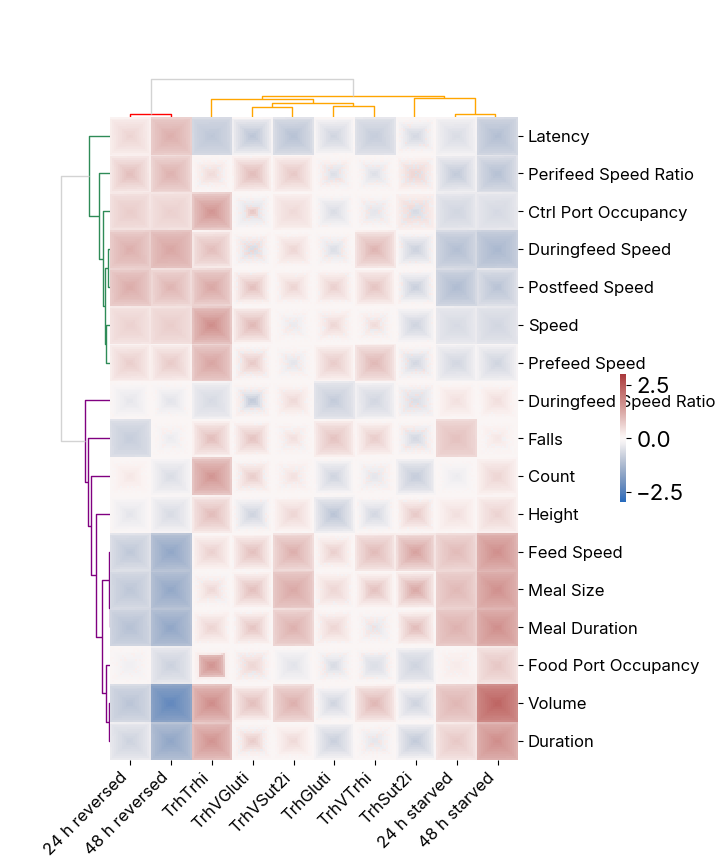

In [122]:
f

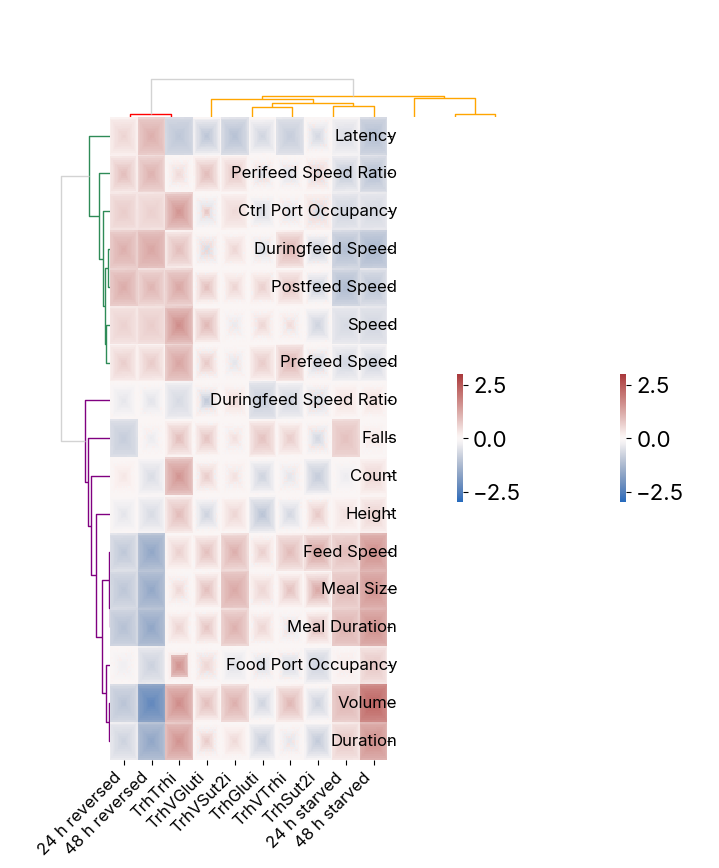

In [118]:
f

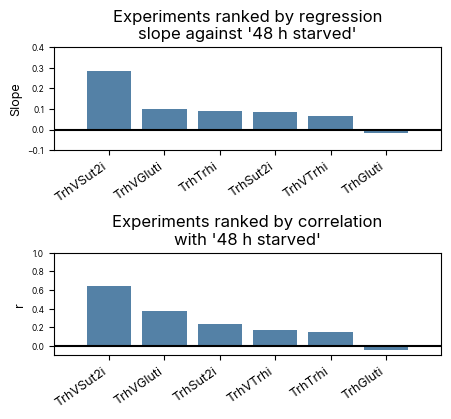

In [102]:
setFont('inter', 6)
gDfdrop = gDf.drop(index = ['24 h starved', '24 h reversed', '48 h starved', '48 h reversed'])
statsDf = pd.DataFrame(data = [], index = gDfdrop.index, columns = ['Slope', 'Intercept', 'r', 'p', 'std_err'])
import scipy
for i in gDfdrop.index:
    statsDf.loc[i, ['Slope', 'Intercept', 'r', 'p', 'std_err']] = scipy.stats.linregress(gDf.loc['48 h starved'], gDfdrop.loc[i])
f, axes = plt.subplots(2, 1)
f.set_size_inches(5, 4)
# sns.heatmap(corr_red, center=0, vmin = -1, vmax = 1, cmap = 'vlag',
#             square=True, linewidths=.5, cbar_kws={"shrink": .4,}, ax = ax)

sns.barplot(x = statsDf.sort_values(by = 'Slope', ascending = False,).index, y = statsDf.sort_values(by = 'Slope', ascending = False,)['Slope'], ax = axes[0], color = 'steelblue')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize = 9, rotation = 35, ha = 'right')
axes[0].plot([-1,7], [0, 0], 'k')
axes[0].set_xlim([-1,6])
axes[0].set_ylim([-.1,0.4])
axes[0].set_ylabel('Slope', fontsize = 9)
xtl = axes[0].get_xticklabels()    
for x in xtl:
    if '>' in x.get_text():
        x.set_style('italic')   
axes[0].set_title('Experiments ranked by regression\nslope against \'48 h starved\'', fontsize = 12)

sns.barplot(x = statsDf.sort_values(by = 'r', ascending = False,).index, y = statsDf.sort_values(by = 'r', ascending = False,)['r'], ax = axes[1], color = 'steelblue')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize = 9 ,rotation = 35, ha = 'right')
axes[1].plot([-1,7], [0, 0], 'k')
axes[1].set_xlim([-1,6])
axes[1].set_ylim([-.1,1])
axes[1].set_ylabel('r', fontsize = 9)
xtl = axes[1].get_xticklabels()    
for x in xtl:
    if '>' in x.get_text():
        x.set_style('italic')   
axes[1].set_title('Experiments ranked by correlation\nwith \'48 h starved\'', fontsize = 12)
f.subplots_adjust(hspace = 1)
f.savefig(figurepath+"/corrMatrix_48.svg", bbox_inches = 'tight')
f.savefig(figurepath+"/corrMatrix_48.png", bbox_inches = 'tight', dpi = 1000)

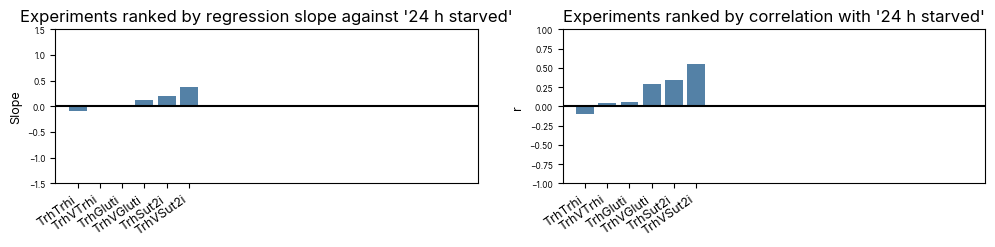

In [63]:
setFont('inter', 6)
gDfdrop = gDf.drop(index = ['24 h starved', '24 h reversed', '48 h starved', '48 h reversed'])
statsDf = pd.DataFrame(data = [], index = gDfdrop.index, columns = ['Slope', 'Intercept', 'r', 'p', 'std_err'])
import scipy
for i in gDfdrop.index:
    statsDf.loc[i, ['Slope', 'Intercept', 'r', 'p', 'std_err']] = scipy.stats.linregress(gDf.loc['24 h starved'], gDfdrop.loc[i])
f, axes = plt.subplots(1, 2)
f.set_size_inches(12, 2)
# sns.heatmap(corr_red, center=0, vmin = -1, vmax = 1, cmap = 'vlag',
#             square=True, linewidths=.5, cbar_kws={"shrink": .4,}, ax = ax)

sns.barplot(x = statsDf.sort_values(by = 'Slope', ascending = True,).index, y = statsDf.sort_values(by = 'Slope')['Slope'], ax = axes[0], color = 'steelblue')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize = 9, rotation = 35, ha = 'right')
axes[0].plot([-1,18], [0, 0], 'k')
axes[0].set_xlim([-1,18])
axes[0].set_ylim([-1.5,1.5])
axes[0].set_ylabel('Slope', fontsize = 9)
xtl = axes[0].get_xticklabels()    
for x in xtl:
    if '>' in x.get_text():
        x.set_style('italic')   
axes[0].set_title('Experiments ranked by regression slope against \'24 h starved\'', fontsize = 12)

sns.barplot(x = statsDf.sort_values(by = 'r', ascending = True,).index, y = statsDf.sort_values(by = 'r')['r'], ax = axes[1], color = 'steelblue')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize = 9 ,rotation = 35, ha = 'right')
axes[1].plot([-1,18], [0, 0], 'k')
axes[1].set_xlim([-1,18])
axes[1].set_ylim([-1,1])
axes[1].set_ylabel('r', fontsize = 9)
xtl = axes[1].get_xticklabels()    
for x in xtl:
    if '>' in x.get_text():
        x.set_style('italic')   
axes[1].set_title('Experiments ranked by correlation with \'24 h starved\'', fontsize = 12)

f.savefig(figurepath+"/corrMatrix_24.svg", bbox_inches = 'tight')
f.savefig(figurepath+"/corrMatrix_24.png", bbox_inches = 'tight', dpi = 1000)

In [ ]:
statsDf.sort_values(by = 'r')['r']

In [73]:
gDf

,Volume,Feed Speed,Meal Size,Meal Duration,Duration,Count,Height,Food Port Occupancy,Ctrl Port Occupancy,Latency,Speed,Prefeed Speed,Duringfeed Speed,Postfeed Speed,Duringfeed Speed Ratio,Perifeed Speed Ratio,Falls
TrhTrhi,1.160626,0.249385,0.099157,0.188985,1.107485,1.021587,0.484033,0.136551,0.988441,-0.770799,1.097646,0.893886,0.507782,0.822520,-0.387203,0.094726,0.377940
TrhGluti,-0.235652,0.185319,0.212848,0.178301,-0.362930,-0.268008,-0.496659,-0.096424,-0.171743,-0.317179,0.116305,0.307447,-0.087118,0.201061,-0.539825,-0.010745,0.427786
TrhSut2i,-0.278218,0.708527,0.435873,0.280236,-0.405055,-0.429565,0.216324,-0.396457,0.223567,-0.165278,-0.276993,-0.125221,-0.235634,-0.229626,-0.164501,0.162629,-0.052755
TrhVTrhi,0.499388,0.529397,0.261753,-0.034968,-0.063045,-0.089639,-0.215093,-0.120259,-0.045379,-0.619158,0.030472,0.548310,0.574855,0.358061,-0.378142,-0.079980,0.247935
TrhVGluti,0.377847,0.354987,0.327689,0.251428,0.097828,0.144159,-0.225272,0.084421,-0.121372,-0.478916,0.396034,0.147337,-0.017072,0.253473,-0.055784,0.379293,0.249913
TrhVSut2i,0.712865,0.707122,0.894369,0.753539,0.153481,0.057733,0.224786,-0.197480,0.285044,-0.739965,-0.030713,-0.042133,0.170802,0.151435,0.126609,0.353610,0.052097
24 h starved,0.783153,0.673002,0.735388,0.837757,0.496642,-0.088957,0.179191,0.105257,-0.497374,-0.337563,-0.451960,-0.367537,-0.837040,-0.862834,0.157081,-0.462288,0.651541
24 h reversed,-0.783153,-0.673002,-0.735388,-0.837757,-0.496642,0.088957,-0.179191,-0.105257,0.497374,0.337563,0.451960,0.367537,0.837040,0.862834,-0.157081,0.462288,-0.651541
48 h starved,1.910540,1.256454,1.252614,1.278736,1.298600,0.288852,0.321309,0.507017,-0.485097,-0.850648,-0.523033,-0.371640,-0.996764,-0.699754,0.134959,-0.731574,0.050277
48 h reversed,-1.910540,-1.256454,-1.252614,-1.278736,-1.298600,-0.288852,-0.321309,-0.507017,0.485097,0.850648,0.523033,0.371640,0.996764,0.699754,-0.134959,0.731574,-0.050277


<AxesSubplot: xlabel='48 h starved', ylabel='TrhSut2i'>

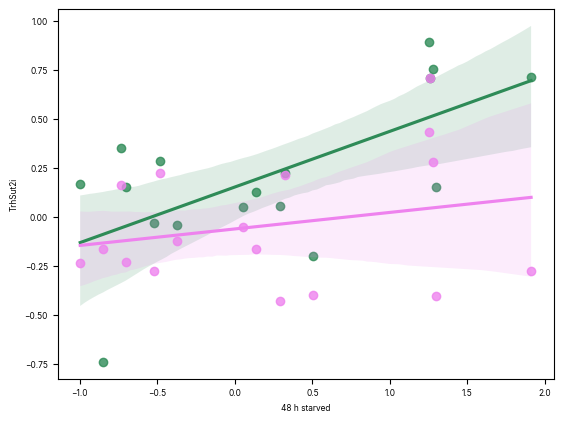

In [77]:
sns.regplot( x = gDf.loc['48 h starved'], y = gDfdrop.loc['TrhVSut2i'], color = 'seagreen')
sns.regplot( x = gDf.loc['48 h starved'], y = gDfdrop.loc['TrhSut2i'], color = 'violet')


In [ ]:

fclu = sns.clustermap(gDf, cmap='vlag',
               method = 'average',
               metric = 'euclidean', 
               figsize=(12, 10), vmin=3, vmax=-3)
newind = fclu.dendrogram_row.reordered_ind
contrasts_new = [contrasts[i] for i in newind]
delta_types_new =  [deltaType[i] for i in newind]
expt_new = [expt[i] for i in newind]

Zy = hierarchy.linkage(gDf, method = 'average', metric = 'euclidean');
Zx = hierarchy.linkage(gDf.T, method = 'average',  metric = 'euclidean');
# Zy_ = [Zy[len(Zy)-i-1] for i in range(len(Zy))]
f = plt.figure(figsize=(10, 9));
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = f.add_gridspec(2, 2,  width_ratios=(1, 4), height_ratios=(1, 6),
                      left=0, right=1, bottom=0, top=1,
                      wspace=0, hspace=0);
# Create the Axes.
ax = f.add_subplot(gs[1, 1]);
ax_denx = f.add_subplot(gs[0, 1]);
ax_deny = f.add_subplot(gs[1, 0]);

%run spiral_heatmap.ipynb

sp, mean = spiral_heatmap(contrasts_new, 21, expt_new, 
                         vectorselection, sort_by = fclu.dendrogram_col.reordered_ind, 
                                            reverse_neg = False,   abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types_new, ax =ax,);


plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
hierarchy.set_link_color_palette(['red', 'orange',  'steelblue', 'forestgreen'])
with plt.rc_context({'lines.linewidth': 1}):
    dn = hierarchy.dendrogram(Zx, ax = ax_denx,above_threshold_color='gray',color_threshold=4,
                               );
    dn = hierarchy.dendrogram(Zy, ax = ax_deny, above_threshold_color='gray',color_threshold=3.4, orientation = 'left',distance_sort='descending'
                              );
ax_denx.set_ylim(0, 15)
ax_denx.set_xlim(0, 250)
ax_denx.set_yticks([])
ax_denx.set_xticks([])
ax_denx.set_frame_on(False) 
ax_deny.set_ylim(0, 10*len(newind))
ax_deny.set_xlim(15,0)
ax_deny.set_yticks([])
ax_deny.set_xticks([])
ax_deny.set_frame_on(False) 
# ax.set_aspect('equal')
ax.yaxis.tick_right()
ax.set_yticklabels(ax.get_yticklabels(), ha = 'left')
f.subplots_adjust(hspace=0)
f

In [ ]:
f_euclidean = f
f_euclidean
f_euclidean.savefig(figurepath+"/ClusterEuclidean.svg", bbox_inches = 'tight')
f_euclidean.savefig(figurepath+"/ClusterEuclidean.png", dpi = 300, bbox_inches = 'tight')

In [ ]:
from svgutils.compose import *

Figure("18cm", "24cm", 
    Panel(SVG(figurepath + 'ClusterCorrelation.svg').scale(0.025),
    Text("a", 1.2, 1, size=0.6, font = 'inter', weight='bold') ).move(-.5, -.5),
    Panel(SVG(figurepath + 'corrMatrix.svg').scale(0.022),
    Text("b", 1.2, 0.3, size=0.6, font = 'inter', weight='bold') ).move(-.5, 19),
    ).save(figurepath+"/Figure5_Correlation.svg")



In [296]:
from svgutils.compose import *

Figure("18cm", "24cm", 
    Panel(SVG(figurepath + 'ClusterCorrelation_alt.svg').scale(0.025),
    Text("a", 1.2, 1, size=0.6, font = 'inter', weight='bold') ).move(-.5, -.5),
    Panel(SVG(figurepath + 'corrMatrix.svg').scale(0.022),
    Text("b", 1.2, 0.3, size=0.6, font = 'inter', weight='bold') ).move(-.5, 19),
    ).save(figurepath+"/Figure5_Correlation_alt.svg")



##### 

In [ ]:
Figure("24cm", "30cm", 
    Panel(SVG(figurepath + 'ClusterEuclidean.svg').scale(0.03),
    Text("a", 0.2, 0.02, size=0.3, font = 'inter', weight='bold') ).move(1, 1),
    Panel(SVG(figurepath + 'corrMatrix.svg').scale(0.016),
    Text("b", 0.2, 0.02, size=0.3, font = 'inter', weight='bold') ).move(1, 15.5),
    ).save(figurepath+"/Figure5_Euclidean.svg")
